Set up

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline


Problem 1 (done)

It reads the image and finds the center, draws a colored patch at the center and prints the coordinates of the center and the pixel values, before and after adding the patch.
 row x colomn coordinates being yc and xc for img center.
The image is read as a NumPy array in BGR format.
used img.shape  to give image dimensions height and width and number of color channels (3).

 row x colomn coordinates being yc and xc for img center.

In [2]:
#1
#Read img
img = cv2.imread('tf2_engineer.jpg')

#img dimensions and center coordinates
h, w, _ = img.shape
yc = h // 2
xc = w // 2

#size and color
patch_h, patch_w = 30, 40
patch_color = (168, 158, 50)  # BGR from hex #329ea8

#copy the img to draw patch
img_patch = img.copy()
  
# Calculate top-left corner of patch
start_y = yc - patch_h // 2
start_x = xc - patch_w // 2

# patch display
cv2.rectangle(img_patch, (start_x, start_y),
              (start_x + patch_w, start_y + patch_h),
              patch_color,
              thickness=-1)

#print center info
print('Center pixel coords:', yc, xc)
print('Center pixel value (BGR):', img[yc, xc])
print('Patch center pixel value (BGR):', img_patch[yc, xc])


Center pixel coords: 92 92
Center pixel value (BGR): [ 67  92 172]
Patch center pixel value (BGR): [168 158  50]


original and edited images side by side (for problem 1)

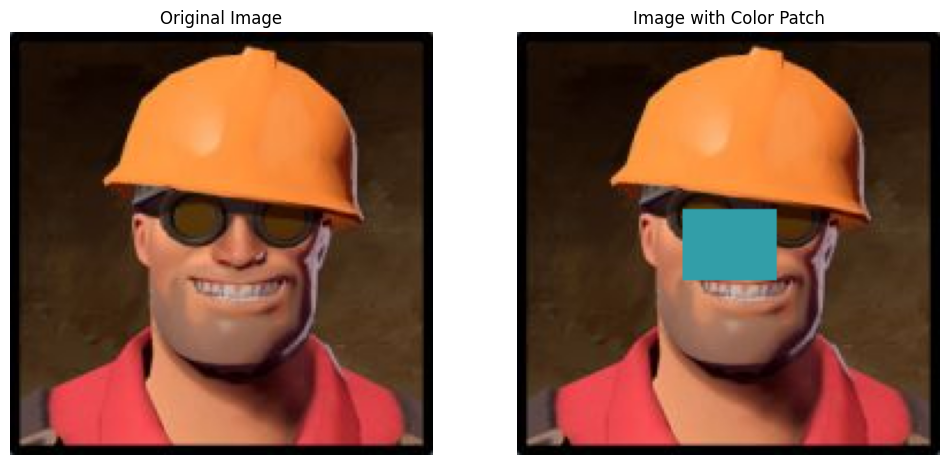

In [26]:
# Convert BGR to RGB for matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_patch_rgb = cv2.cvtColor(img_patch, cv2.COLOR_BGR2RGB)

# Display side by side
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_patch_rgb)
plt.title('Image with Color Patch')
plt.axis('off')

plt.show()

Problem 2
1. Read and display the original image in grayscale.
2. Find the negative of the input image.
3. Display the negative image.
4. From the original image get the intensity value of 5 random pixels, and from the negative image
get the intensity value of same pixels. Print pixel values to show pixel values before and after.

- > so loading img in grayscale img being a 2D NumPy array 
and extracting h and w of the img to use in picking pixel coordinates randomly 



In [3]:

# Read image in grayscale
img = cv2.imread('einstein.tif', cv2.IMREAD_GRAYSCALE)

# Get image shape
h, w = img.shape

# Create negative image
negative_img = 255 - img

# Pick 5 random pixels and print their values in both original and negative
print("Comparing pixel values:")
for i in range(5):
    y = random.randint(0, h - 1)
    x = random.randint(0, w - 1)
    orig_val = img[y, x]
    neg_val = negative_img[y, x]
    print(f"Pixel at ({y},{x}): Original px = {orig_val}, Negative px = {neg_val}")


Comparing pixel values:
Pixel at (104,636): Original px = 104, Negative px = 151
Pixel at (666,490): Original px = 130, Negative px = 125
Pixel at (222,416): Original px = 135, Negative px = 120
Pixel at (537,450): Original px = 98, Negative px = 157
Pixel at (236,703): Original px = 104, Negative px = 151


> Display original and negative images side by side


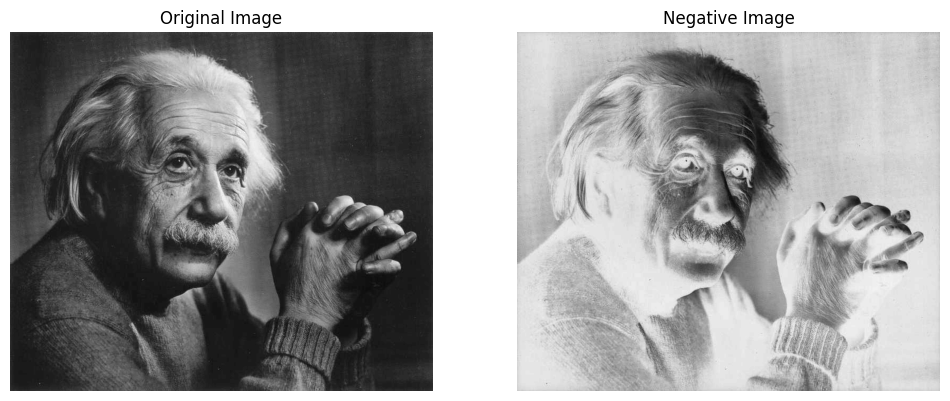

In [ ]:
# Show original and negative side by side
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray') #Without cmap='gray' matplotlib tries to display the image in color
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(negative_img, cmap='gray')
plt.title('Negative Image')
plt.axis('off')

plt.show()



Problem 3


For this problem, use the image named as pout.tiff.
1. Read and display the original image in grayscale.
2. Apply log transform to original image and display the result.
3. Apply inverse log transform to original image and display the result.
4. Apply inverse log transform to image you get from step 2 and display the result.
5. Comment on the images you get from step 2 and step 4.

- > Here I applied log and inverse log then compared the results

In [ ]:
#img
img = cv2.imread('pout.tif', cv2.IMREAD_GRAYSCALE)

# for processing converted to float
img_float = img.astype(np.float32)

# log transform: s = c*log(1+r)
c = 255 / np.log(1 + np.max(img_float))
log_transform = c * np.log(1 + img_float)
log_transform = np.array(log_transform, dtype=np.uint8)

#When applying inverse log transform directly, the image appeared black
#cuz the values were out of range
#so I scalled the imgs before expm1 to avoid that
img_float_scaled = img_float / 255.0  #scale to 0,1

#inverse log with scaling
inv_log_org = np.expm1(img_float_scaled * 5)  #5 to avoid black image
inv_log_org = inv_log_org / np.max(inv_log_org) * 255  # normalize back to [0,255]
inv_log_org = np.array(inv_log_org, dtype=np.uint8)

# Same for inverse log of log transformed image
log_float = log_transform.astype(np.float32) / 255.0
inv_log_log = np.expm1(log_float * 5)
inv_log_log = inv_log_log / np.max(inv_log_log) * 255
inv_log_log = np.array(inv_log_log, dtype=np.uint8)



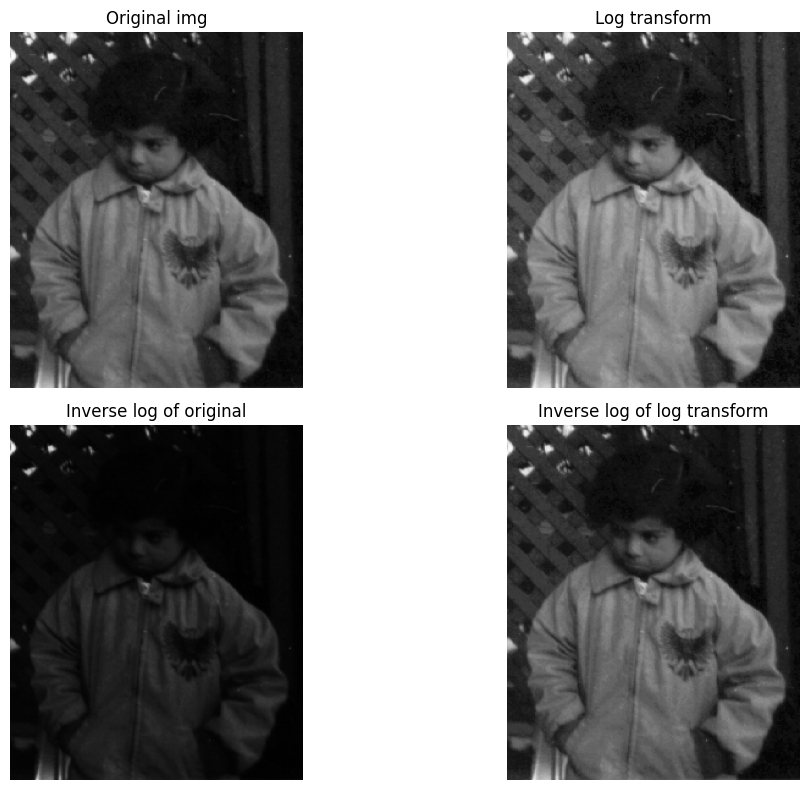

In [15]:
plt.figure(figsize=(12,8))  #smaller figure

plt.subplot(2,2,1)
plt.imshow(img, cmap='gray')
plt.title('Original img')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(log_transform, cmap='gray')
plt.title('Log transform')
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(inv_log_org, cmap='gray')
plt.title('Inverse log of original')
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(inv_log_log, cmap='gray')
plt.title('Inverse log of log transform')
plt.axis('off')

plt.tight_layout()  #this adjusts spacing nicely
plt.show()


# problem 4

sharpen the moon using spatial and frequency domain methods using different k values.


In [ ]:

# Read grayscale image
img = cv2.imread('moon.tif', cv2.IMREAD_GRAYSCALE)
img_float = img.astype(np.float32) / 255.0  # normalize to [0,1]

# Define k values to test
k_values = [0.2, 0.5, 1]

# Spatial domain unsharp masking
def unsharp_mask_spatial(image, k):
    # Apply Gaussian blur (to get mask)
    blurred = cv2.GaussianBlur(image, (5,5), 1)
    mask = image - blurred
    # Add mask scaled by k
    sharpened = image + k * mask
    # Clip values to [0,1]
    sharpened = np.clip(sharpened, 0, 1)
    return sharpened

# Frequency domain unsharp masking
def unsharp_mask_freq(image, k, D0=30):
    # Get Fourier transform of image
    F = np.fft.fft2(image)
    F_shift = np.fft.fftshift(F)

    # Create high-pass filter (ideal)
    rows, cols = image.shape
    crow, ccol = rows//2, cols//2
    H = np.ones((rows, cols))

    # Create a circular low-pass area around center with radius D0
    for u in range(rows):
        for v in range(cols):
            D = np.sqrt((u - crow)**2 + (v - ccol)**2)
            if D <= D0:
                H[u,v] = 0  # block low frequencies

    # High pass filter is H itself (1 inside high freq areas, 0 low freq)
    # Apply formula: G =F*(1+k*H)
    G = F_shift * (1 + k * H)

    # Inverse fourier transform to get image
    G_ishift = np.fft.ifftshift(G)
    img_back = np.fft.ifft2(G_ishift)
    img_back = np.real(img_back)

    # Clip to [0,1]
    img_back = np.clip(img_back, 0, 1)

    return img_back

# Process images with different k
spatial_results = [unsharp_mask_spatial(img_float, k) for k in k_values]
freq_results = [unsharp_mask_freq(img_float, k) for k in k_values]


Display spatial and frequency domain results side by side for each k


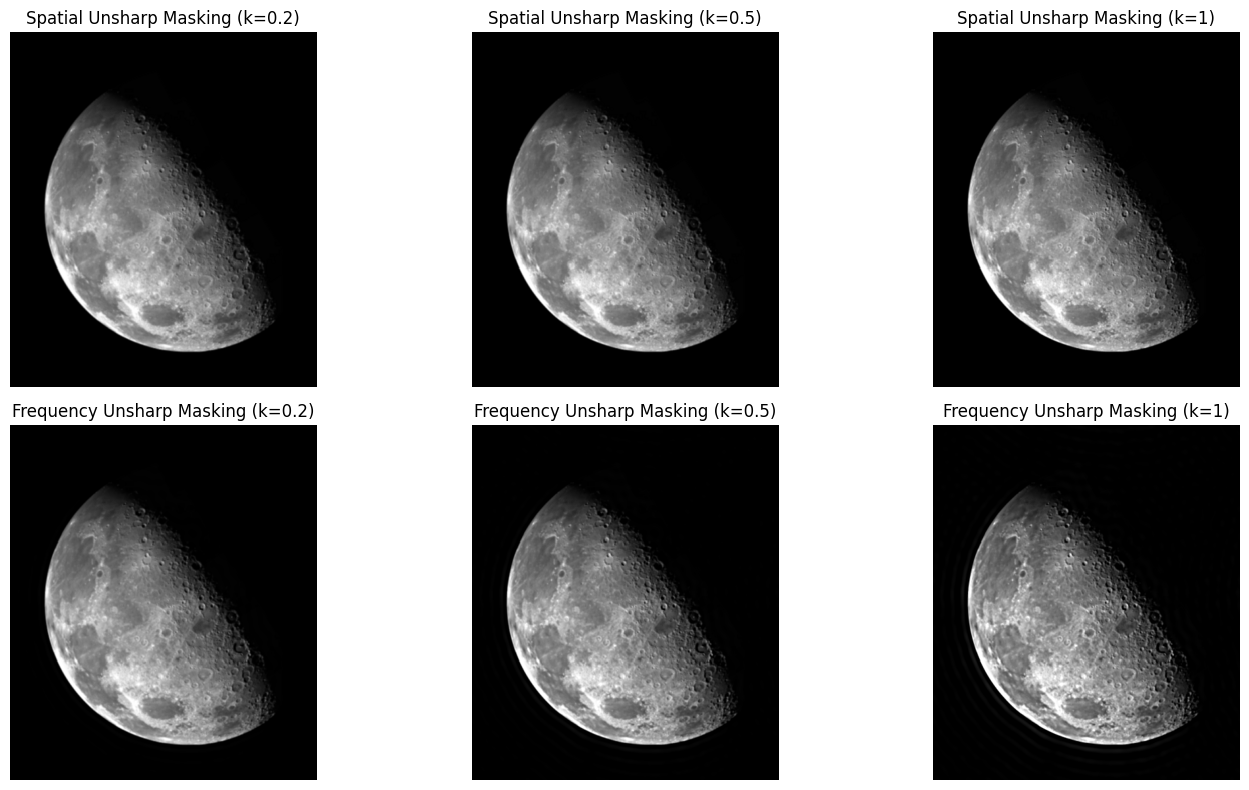

In [17]:
plt.figure(figsize=(15, 8))  # wide enough for 3 images per row

# Top row: spatial results
for i, k in enumerate(k_values):
    plt.subplot(2, 3, i + 1)
    plt.imshow(spatial_results[i], cmap='gray')
    plt.title(f'Spatial Unsharp Masking (k={k})')
    plt.axis('off')

# Bottom row: frequency results
for i, k in enumerate(k_values):
    plt.subplot(2, 3, i + 4)  # 4,5,6 positions for second row
    plt.imshow(freq_results[i], cmap='gray')
    plt.title(f'Frequency Unsharp Masking (k={k})')
    plt.axis('off')

plt.tight_layout()
plt.show()


#Problem 5

noise reduction in grayscale img and smoothing it using gaussian filtering and median  for salt and paper noise


In [18]:
# Read the pcb.tif image in grayscale
img = cv2.imread('pcb.tif', cv2.IMREAD_GRAYSCALE)

# Median filter to remove salt-and-pepper noise
median_filtered = cv2.medianBlur(img, 3)

# Gaussian blur to smooth residual noise
gaussian_filtered = cv2.GaussianBlur(median_filtered, (3,3), 0)


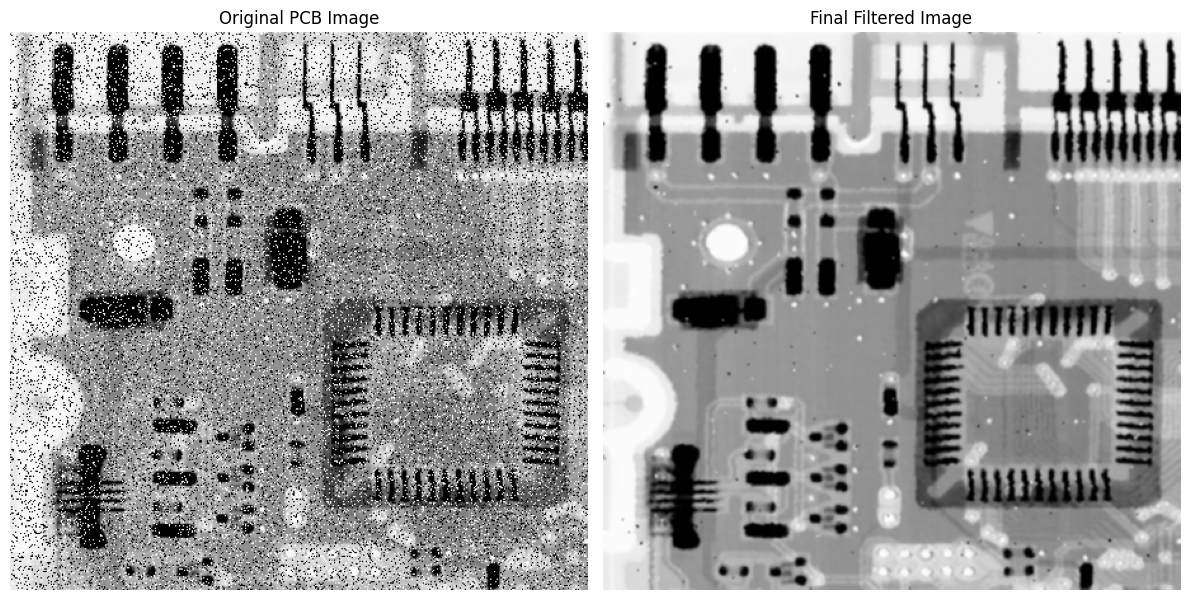

In [ ]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('Original PCB Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(gaussian_filtered, cmap='gray')
plt.title('Final Filtered Image')
plt.axis('off')

plt.tight_layout()
plt.show()


# problem 6

enhancing the contrast of img using histogram equalization and contrast stretching

In [ ]:
#read image in grayscale
img6 = cv2.imread("pollen.tif", cv2.IMREAD_GRAYSCALE)

#histogram equalization to enhance contrast
equalized6 = cv2.equalizeHist(img6)

# Apply contrast stretching (min-max normalization)
min_val = np.min(img6)
max_val = np.max(img6)
stretched6 = ((img6 - min_val) / (max_val - min_val) * 255).astype(np.uint8)


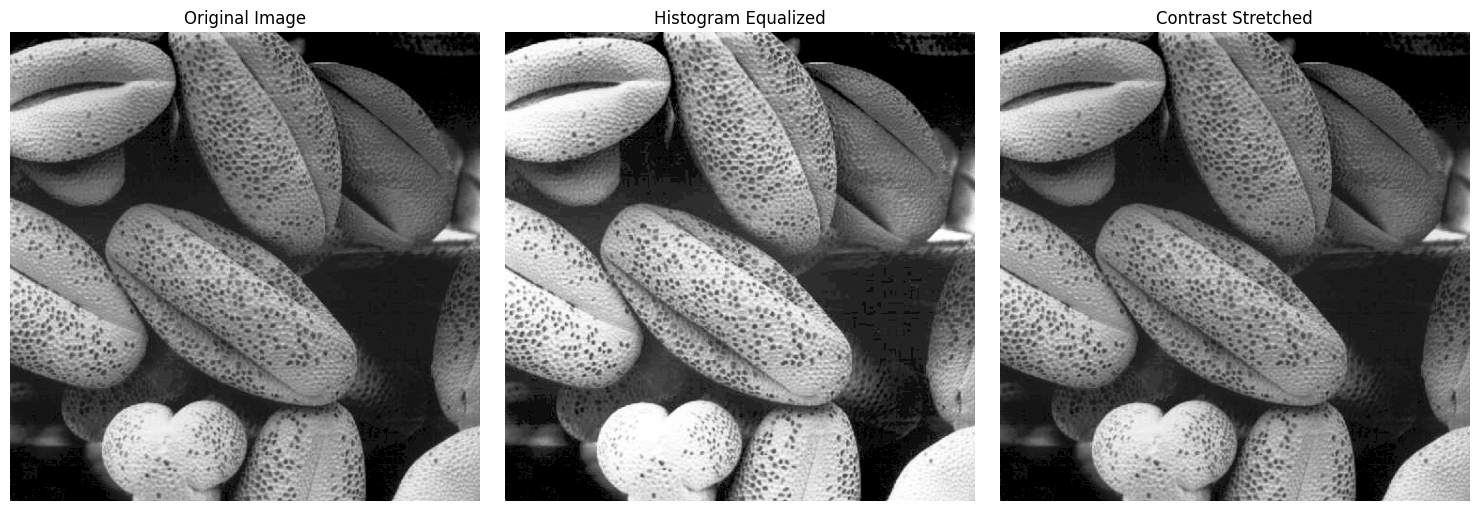

In [24]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(img6, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(equalized6, cmap='gray')
plt.title("Histogram Equalized")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(stretched6, cmap='gray')
plt.title("Contrast Stretched")
plt.axis("off")

plt.tight_layout()
plt.show()
